In [18]:
import pandas as pd

df = pd.read_csv("steam_games_dataset_kaggle.csv")

#
df= df[["name","genre","popular_tags"]]


df = pd.DataFrame(df.dropna())

df = df.head(3000)

unique_genres = set([genre for genres in df['genre'] for genre in genres.split(',')])


for genre in unique_genres:
    df[genre] = df['genre'].apply(lambda x: int(genre in x))

# Print the updated dataset
df.head()

,name,genre,popular_tags,Utilities,Indie,Free to Play,Adventure,Education,Racing,Massively Multiplayer,...,Strategy,RPG,Simulation,Sports,Animation & Modeling,Software Training,Video Production,Accounting,Valve,Movie
0,DOOM,Action,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Action,Adventure,Massively Multiplayer","Survival,Shooter,Multiplayer,Battle Royale,PvP...",0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,BATTLETECH,"Action,Adventure,Strategy","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,DayZ,"Action,Adventure,Massively Multiplayer","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,EVE Online,"Action,Free to Play,Massively Multiplayer,RPG,...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0


In [19]:
genre_counts_dict = {}
for genre in unique_genres:
    genre_counts_dict[genre] = df['genre'].apply(lambda x: genre in x).sum()

sorted_genres = sorted(genre_counts_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the 10 most popular genres
top_10_genres = sorted_genres[:10]
for genre, count in top_10_genres:
    print(genre, count)

Indie 1509
Action 1388
Adventure 1064
Simulation 770
Strategy 764
RPG 727
Casual 474
Early Access 372
Free to Play 192
Massively Multiplayer 170


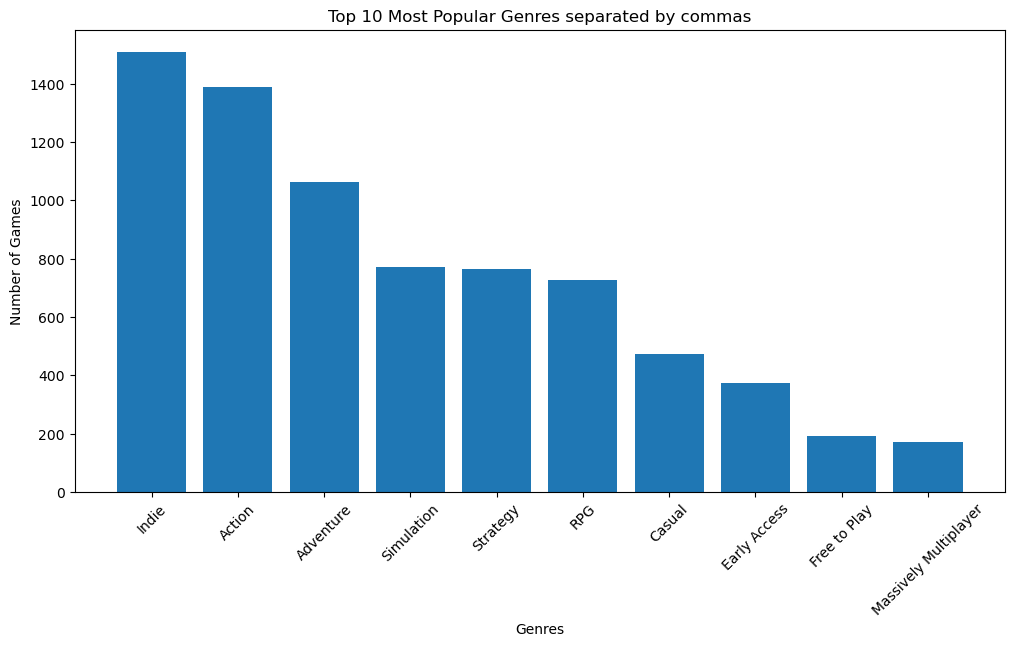

In [20]:
import matplotlib.pyplot as plt
genres = [genre for genre, count in top_10_genres]
counts = [count for genre, count in top_10_genres]

# Printing the top 10 genre separated by commas
plt.figure(figsize=(12, 6))
plt.bar(genres, counts)
plt.title('Top 10 Most Popular Genres separated by commas')
plt.xlabel('Genres')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

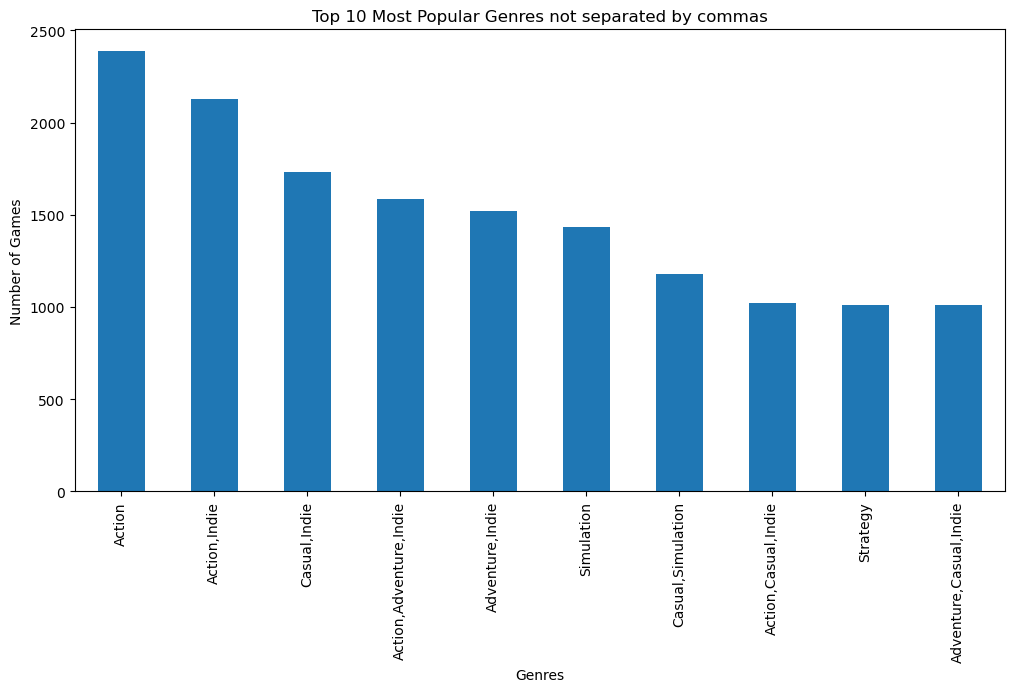

In [21]:
df = pd.read_csv("steam_games_dataset_kaggle.csv")

genre_counts = df['genre'].value_counts()

popular_genres = genre_counts.sort_values(ascending=False)

# Printing the top 10 genres not separated by commas

plt.figure(figsize=(12, 6))
popular_genres[:10].plot(kind='bar')
plt.title('Top 10 Most Popular Genres not separated by commas')
plt.xlabel('Genres')
plt.ylabel('Number of Games')
plt.show()

In [34]:
df = df.dropna(subset=["popular_tags"])


# Counting the occurrence of each tag
tag_counts = {}
for tags in df["popular_tags"]:
    if isinstance(tags, str):  # Checking for NaN values
        for tag in tags.split(","):
            tag = tag.strip()
            if tag not in tag_counts:
                tag_counts[tag] = 0
            tag_counts[tag] += 1

# Sorting the tags based on their counts
sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# Selecting the top 10 most popular tags
top_tags = sorted_tags[:10]

# Extracting the tag names
popular_tags = [tag[0] for tag in top_tags]
for popular_tags, count in top_tags:
    print(popular_tags, count)

Indie 23718
Action 16112
Adventure 13378
Casual 12969
Simulation 9273
Strategy 8586
RPG 7362
Singleplayer 6772
Early Access 6247
Great Soundtrack 3209


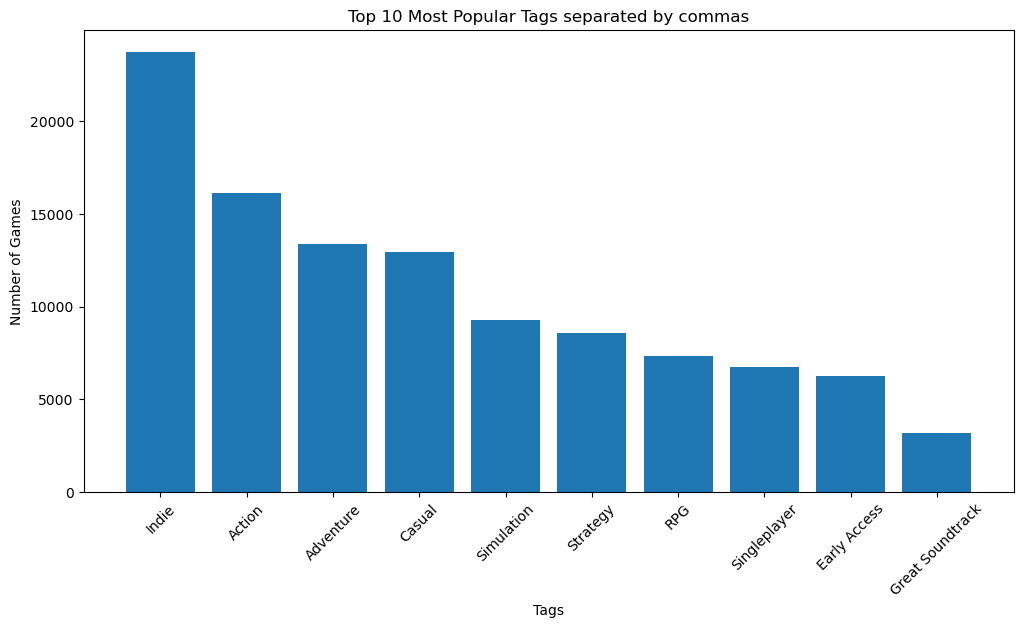

In [36]:
# top 10 most popular tags
tags = [tag for tag, count in top_tags]
counts = [count for tag, count in top_tags]

plt.figure(figsize=(12, 6))
plt.bar(tags, counts)
plt.title('Top 10 Most Popular Tags separated by commas')
plt.xlabel('Tags')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df = pd.read_csv("steam_games_dataset_kaggle.csv")

df = df[["name","release_date","genre","popular_tags"]]
df = pd.DataFrame(df.dropna())

df = df.head(3000)
df.head(10)

In [ ]:
# get me the newest games by the last 4 digits of the release date
df['release_date'] = df['release_date'].astype(str).str[-4:]
df = df[df['release_date'] != 'TBA']
df = df[df['release_date'] != '2020']

df = df.sort_values(by='release_date', ascending=False)
df.head(30)


In [ ]:
# get the oldest games by the last 4 digits of the release date
df = df.sort_values(by='release_date', ascending=True)
df.head(30)

In [ ]:
tag_counts_per_year = {}

for index, row in df.iterrows():
    year = row['release_date']
    tags = row['popular_tags'].split(',')
    for tag in tags:
        tag = tag.strip()  # Remove leading/trailing whitespaces
        if year not in tag_counts_per_year:
            tag_counts_per_year[year] = {}
        if tag not in tag_counts_per_year[year]:
            tag_counts_per_year[year][tag] = 0
        tag_counts_per_year[year][tag] += 1

# Sorting the years in ascending order
years = sorted(tag_counts_per_year.keys())

# Finding the most popular tag for each year
most_popular_tags = []
for year in years:
    tags = tag_counts_per_year[year]
    sorted_tags = sorted(tags.items(), key=lambda x: x[1], reverse=True)
    most_popular_tag = sorted_tags[0][0] if sorted_tags else None
    most_popular_tags.append(most_popular_tag)

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(years, most_popular_tags, marker='o')
plt.title('Most Popular Tag for Each Year')
plt.xlabel('Year')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.show()

In [ ]:

least_popular_tags = []
for year in years:
    tags = tag_counts_per_year[year]
    sorted_tags = sorted(tags.items(), key=lambda x: x[1])
    least_popular_tag = sorted_tags[0][0] if sorted_tags else None
    least_popular_tags.append(least_popular_tag)

plt.figure(figsize=(12, 6))
plt.plot(years, least_popular_tags, marker='o')
plt.title('Least Popular Tag for Each Year')
plt.xlabel('Year')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.show()

In [ ]:
genre_counts_per_year = {}

# Iterating over each row
for index, row in df.iterrows():
    year = row['release_date']
    genres = row['genre'].split(',')
    for genre in genres:
        genre = genre.strip()  # Remove leading/trailing whitespaces
        if year not in genre_counts_per_year:
            genre_counts_per_year[year] = {}
        if genre not in genre_counts_per_year[year]:
            genre_counts_per_year[year][genre] = 0
        genre_counts_per_year[year][genre] += 1

# Sorting the years in ascending order
years = sorted(genre_counts_per_year.keys())

# Finding the most popular genre for each year
most_popular_genres = []
for year in years:
    genres = genre_counts_per_year[year]
    sorted_genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)
    most_popular_genre = sorted_genres[0][0] if sorted_genres else None
    most_popular_genres.append(most_popular_genre)

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(years, most_popular_genres, marker='o')
plt.title('Most Popular Genre for Each Year')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#least popular genre
least_popular_genres = []
for year in years:
    genres = genre_counts_per_year[year]
    sorted_genres = sorted(genres.items(), key=lambda x: x[1])
    least_popular_genre = sorted_genres[0][0] if sorted_genres else None
    least_popular_genres.append(least_popular_genre)

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(years, least_popular_genres, marker='o')
plt.title('Least Popular Genre for Each Year')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.show()